TensorFlow Sun397 Image Classification Dataset
https://www.tensorflow.org/datasets/catalog/sun397

# Data

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/Work/Data")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
    
    import sys
    sys.path.append(str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

Mounted at /content/drive


In [ ]:
AUX_DATA_ROOT

PosixPath('/content/drive/My Drive/Work/Data')

In [ ]:
if not Path("data_sets/test/class2_non_human/00003.png").is_file():
    import zipfile
    with zipfile.ZipFile(AUX_DATA_ROOT / 'data_sets.zip', 'r') as archive:
        archive.extractall()


In [ ]:
if not Path("data_sets/test/class2_non_human/Image_1_1.jpg").is_file():
    import zipfile
    with zipfile.ZipFile(AUX_DATA_ROOT / 'real_test.zip', 'r') as archive:
        archive.extractall()

### Transforms

In [ ]:
from PIL import ImageFile
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import os
from tqdm import tqdm


CALC_METRICS=False
if CALC_METRICS==True:
      ImageFile.LOAD_TRUNCATED_IMAGES = True

      transform_tr_normalization=transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
      tr_normalization=ImageFolder('/content/train',transform=transform_tr_normalization)
      image_loader=DataLoader(tr_normalization, batch_size= 1, shuffle= False,num_workers = 1,pin_memory= True)
      def batch_mean_and_sd(loader):
          cnt = 0
          fst_moment = torch.empty(3)
          snd_moment = torch.empty(3)

          for images, _ in tqdm(loader):
              b, c, h, w = images.shape
              nb_pixels = b * h * w
              sum_ = torch.sum(images, dim=[0, 2, 3])
              sum_of_square = torch.sum(images ** 2,
                                        dim=[0, 2, 3])
              fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
              snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
              cnt += nb_pixels

          mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
          return mean,std
      mean,std=batch_mean_and_sd(image_loader)
      print(mean,std)

In [ ]:

transform_tr = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
transform_val = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
transform_test = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])

transform_tr = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.Resize((128,128)),
                            transforms.CenterCrop((112,112)),
                            transforms.Resize((128,128)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.5127, 0.4442, 0.3946],
                                                 std=[0.2871, 0.2668, 0.2722])])
                            #transforms.Normalize(mean=[0.485, 0.456, 0.406]
                                                 #,std=[0.229, 0.224, 0.225])])

transform_tr2 = transforms.Compose([torchvision.transforms.RandomRotation(10),
                                  torchvision.transforms.RandomHorizontalFlip(),
                                  torchvision.transforms.RandomVerticalFlip(),
                                   torchvision.transforms.GaussianBlur(5, sigma=(0.1, 2.0)),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.5127, 0.4442, 0.3946],
                                                 std=[0.2871, 0.2668, 0.2722])])

transform_val = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.5127, 0.4442, 0.3946],
                                                 std=[0.2871, 0.2668, 0.2722])])
transform_test = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.5127, 0.4442, 0.3946],
                                                 std=[0.2871, 0.2668, 0.2722])])
transform_real_test = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.5127, 0.4442, 0.3946],
                                                 std=[0.2871, 0.2668, 0.2722])])

In [ ]:
train = ImageFolder('/content/train',transform=transform_tr)
val = ImageFolder('/content/val',transform=transform_val)
test = ImageFolder('/content/test',transform=transform_test)
real_test=ImageFolder('/content/real_test',transform=transform_real_test)



### Dataloaders

In [ ]:
import torch 
train_loader=torch.utils.data.DataLoader(train, batch_size=512, 
                              shuffle=True, drop_last=False,num_workers=1)
val_loader=torch.utils.data.DataLoader(val, batch_size=512, 
                              shuffle=True, drop_last=False,num_workers=1)
test_loader=torch.utils.data.DataLoader(test, batch_size=1, 
                              shuffle=True, drop_last=False,num_workers=1)
real_test_loader=torch.utils.data.DataLoader(real_test, batch_size=1, 
                              shuffle=False, drop_last=False,num_workers=1)
dataloaders={'train':train_loader,'val':val_loader}

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

In [ ]:
next(iter(train_loader))[0].shape

torch.Size([512, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


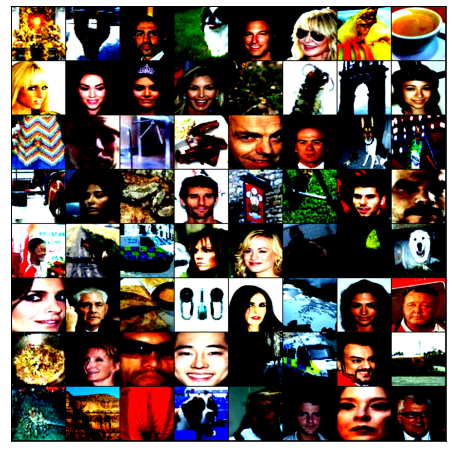

In [ ]:
show_batch(next(iter(train_loader)))

# Device

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Model

In [ ]:
#Imports 
from torchvision import datasets, models, transforms
import torch.nn as nn

### Define Finetuning state

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
# choose from the zoo of models
def initialize_model(model_name, num_classes, feature_extract,input_size,use_pretrained=True):

    model_ft = None
    input_size =input_size

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
    elif model_name == "resnet50":
        """ Resnet50
        """
        model_ft = models.resnet50(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224
    elif model_name == "resnet152":
        """ Resnet152
        """
        model_ft = models.resnet152(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        model_ft = models.densenet161(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

### Change number of classes

In [ ]:
torch.cuda.empty_cache()

In [ ]:
num_classes=2

feature_extract = True #When False, we finetune the whole model,when True we only update the reshaped layer params
input_size=128
model,_=initialize_model('densenet', num_classes, feature_extract,input_size,use_pretrained=True)
model.to(device)

# Optimizer

In [ ]:
optimizer=torch.optim.RAdam(model.parameters(),
                            lr=0.001,
                            betas=(0.9,0.999),
                            eps=1e-08,
                            weight_decay=0.0001)

# Scheduler

In [ ]:
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Training and Validation functions


In [ ]:
def validate(dataloader, model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    loss_i = 0.0
    acc_i = 0
    y_pred_list=[]
    y_true_list=[]
    with torch.no_grad():
        for X, Y in tqdm(dataloader):
            X_device=X.to(device)
            Y_device=Y.to(device)
                  
            prediction=model(X_device)
          
            _, preds = torch.max(prediction, 1)

            y_pred_list.append(preds.detach().cpu().numpy()[0])
            y_true_list.append(Y_device.detach().cpu().numpy()[0])

            loss_func=criterion(prediction,Y_device)

            loss_i += loss_func.item() * X_device.size(0)
            acc_i += torch.sum(preds == Y_device.data)

    loss=loss_i / len(dataloader.dataset)
    accuracy = acc_i.double()*100 / len(dataloader.dataset)
    
    return accuracy.detach().cpu().numpy(),loss,y_pred_list,y_true_list

In [ ]:
def train_model(train_dataloader, val_dataloader, model, optimizer,scheduler,criterion,num_epochs):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    loss_i = 0.0
    acc_i = 0
    criterion = criterion
    scheduler=scheduler
    for epoch in range(num_epochs):
        model.train()
        for X, Y in tqdm(train_dataloader):
            model.zero_grad()
            X_device=X.to(device)
            Y_device=Y.to(device)
            
            prediction=model(X_device)
          
            _, preds = torch.max(prediction, 1)
            
            loss_func=criterion(prediction,Y_device)
            
            loss_func.backward()
          
            optimizer.step()
            
            loss_i += loss_func.item() * X_device.size(0)
            acc_i += torch.sum(preds == Y_device.data)
        
        epoch_tr_loss=loss_i / len(train_dataloader.dataset)
      
        epoch__tr_acc = acc_i.double() / len(train_dataloader.dataset)
        scheduler.step()
        
        
         
        epoch_val_acc,epoch_val_loss,y_pred_list,y_true_list=validate(val_dataloader, model,criterion)

        print(f'Training Loss: {epoch_tr_loss:.3f} Training Acc: {epoch__tr_acc:.3f}')
        print(f'Validation Loss: {epoch_val_loss:.3f} Validation Acc: {epoch_val_acc:.3f}')


In [ ]:
import time
import copy
from torch.utils.tensorboard import SummaryWriter

def train_model(model, dataloaders, criterion, optimizer, num_epochs, scheduler,is_inception=False,):
    since = time.time()
    writer = SummaryWriter(f"{model. __class__. __name__}")


    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    scheduler=scheduler
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    if is_inception and phase == 'train':
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            writer.add_scalar(f'{phase} accuracy', epoch_acc)
            writer.add_scalar(f'{phase} loss', epoch_loss)
            writer.close()  
            scheduler.step()
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

# Model training

In [ ]:
train_model(model=model, dataloaders=dataloaders, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, num_epochs=5, scheduler=scheduler,is_inception=False,)


In [ ]:
!tensorboard --logdir=Resnet

# Saving a model

In [ ]:
checkpoint = { 
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'lr_sched': scheduler}
variation=1611 #Models variation ,example: ResNet18, ResNet34
torch.save(checkpoint, f'{model. __class__. __name__}_{variation}.pth')

# Evaluation of the Testing performance

In [ ]:
def validate(dataloader, model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #device = torch.device("cpu")

    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    loss_i = 0.0
    acc_i = 0
    y_pred_list=[]
    y_true_list=[]
    with torch.no_grad():
        for X, Y in tqdm(dataloader):
            X_device=X.to(device)
            Y_device=Y.to(device)
                  
            prediction=model(X_device)
          
            _, preds = torch.max(prediction, 1)

            y_pred_list.append(preds.detach().cpu().numpy()[0])
            y_true_list.append(Y_device.detach().cpu().numpy()[0])

            loss_func=criterion(prediction,Y_device)

            loss_i += loss_func.item() * X_device.size(0)
            acc_i += torch.sum(preds == Y_device.data)
            

    loss=loss_i / len(dataloader.dataset)
    accuracy = acc_i.double()*100 / len(dataloader.dataset)
    
    return accuracy.detach().cpu().numpy(),loss,y_pred_list,y_true_list


In [ ]:
num_classes=2
feature_extract = True #When False, we finetune the whole model,when True we only update the reshaped layer params
input_size=128
model,_=initialize_model('densenet', num_classes, feature_extract,input_size,use_pretrained=True)
checkpoint = torch.load('/content/drive/MyDrive/Work/checkpoints/DenseNet_1611.pth')
model.load_state_dict(checkpoint['model'])
model.to(device)
model.eval()

In [ ]:
acc,loss,y_pred,y_true=validate(real_test_loader, model)

 70%|███████   | 256/365 [00:09<00:04, 24.12it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 78%|███████▊  | 283/365 [00:10<00:02, 29.17it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 365/365 [00:12<00:00, 29.14it/s]


In [ ]:
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

F1-score is 0.9086
ROC-AUC score is 0.9253
Accuracy score is 91.5068%
     0    1
0  180   30
1    1  154
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       210
           1       0.84      0.99      0.91       155

    accuracy                           0.92       365
   macro avg       0.92      0.93      0.91       365
weighted avg       0.93      0.92      0.92       365



In [ ]:
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

In [ ]:
def validate_with_pics(dataloader, model,treshold=0.5,show_images_bool=False):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #device = torch.device("cpu")

    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    loss_i = 0.0
    acc_i = 0
    y_pred_list=[]
    y_true_list=[]
    sigm=[]
    with torch.no_grad():
        for X, Y in tqdm(dataloader):
            pred=float("NAN")

            X_device=X.to(device)
            Y_device=Y.to(device)
                  
            prediction=model(X_device)
          
            sigm0 = torch.nn.functional.softmax(prediction,dim=1)
            sigm0 = float(sigm0.detach().cpu().numpy()[0][0])
            sigm.append(sigm0)

            if sigm0>=treshold:
               pred=0
              
            elif sigm0<treshold:
                pred=1
            
            y_pred_list.append(pred)
            y_true_list.append(Y.item())


            acc_i += torch.sum(pred == Y_device.data)

            if show_images_bool == True:
              if (pred!=Y) :
                print(f'Actual label is {Y.item()}, while predicted label is {pred}')
                show_images(X)
            

    accuracy = acc_i.double()*100 / len(dataloader.dataset)

    
    return accuracy.detach().cpu().numpy(),y_pred_list,y_true_list,sigm

In [ ]:
acc,y_pred,y_true,sigm=validate_with_pics(real_test_loader, model,treshold=0.5,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

 70%|███████   | 257/365 [00:08<00:03, 30.00it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 78%|███████▊  | 283/365 [00:09<00:03, 26.41it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 365/365 [00:12<00:00, 29.30it/s]

F1-score is 0.9086
ROC-AUC score is 0.9253
Accuracy score is 91.5068%
     0    1
0  180   30
1    1  154
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       210
           1       0.84      0.99      0.91       155

    accuracy                           0.92       365
   macro avg       0.92      0.93      0.91       365
weighted avg       0.93      0.92      0.92       365



In [ ]:
acc,y_pred,y_true,sigm=validate_with_pics(real_test_loader, model,treshold=0.55,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

 71%|███████   | 258/365 [00:08<00:03, 31.00it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 77%|███████▋  | 282/365 [00:09<00:02, 38.22it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 365/365 [00:12<00:00, 30.19it/s]

F1-score is 0.9059
ROC-AUC score is 0.923
Accuracy score is 91.2329%
     0    1
0  179   31
1    1  154
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       210
           1       0.83      0.99      0.91       155

    accuracy                           0.91       365
   macro avg       0.91      0.92      0.91       365
weighted avg       0.93      0.91      0.91       365



In [ ]:
acc,y_pred,y_true,sigm=validate_with_pics(real_test_loader, model,treshold=0.6,show_images_bool=False)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

 71%|███████   | 259/365 [00:07<00:03, 33.58it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 78%|███████▊  | 285/365 [00:08<00:02, 29.67it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 365/365 [00:10<00:00, 33.96it/s]

F1-score is 0.9006
ROC-AUC score is 0.9182
Accuracy score is 90.6849%
     0    1
0  177   33
1    1  154
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       210
           1       0.82      0.99      0.90       155

    accuracy                           0.91       365
   macro avg       0.91      0.92      0.91       365
weighted avg       0.92      0.91      0.91       365



In [ ]:
acc,y_pred,y_true,sigm=validate_with_pics(real_test_loader, model,treshold=0.65,show_images_bool=True)
from sklearn.metrics import  f1_score, confusion_matrix, roc_auc_score,classification_report
import pandas as pd
import numpy as np
print(f'F1-score is {np.round(f1_score(y_true,y_pred),4)}')
print(f'ROC-AUC score is {np.round(roc_auc_score(y_true,y_pred),4)}')
print(f'Accuracy score is {np.round(float(acc),4)}%')
print(pd.DataFrame(confusion_matrix(y_true,y_pred)))
print(classification_report(y_true,y_pred))

In [ ]:
true0_pred0_idx=np.where(np.array(y_pred)[np.where(np.array(y_true)==0)]==0)
true0_pred1_idx=np.where(np.array(y_pred)[np.where(np.array(y_true)==0)]==1)

true1_pred0_idx=np.where(np.array(y_pred)[np.where(np.array(y_true)==1)]==0)


sigm_true0_pred0=np.array(pd.DataFrame(sigm)[0][:(np.array(y_true)==0).sum()])[true0_pred0_idx]
sigm_true0_pred1=np.array(pd.DataFrame(sigm)[0][:(np.array(y_true)==0).sum()])[true0_pred1_idx]
sigm_true1_pred0=np.array(pd.DataFrame(sigm)[0][:(np.array(y_true)==1).sum()])[true1_pred0_idx]

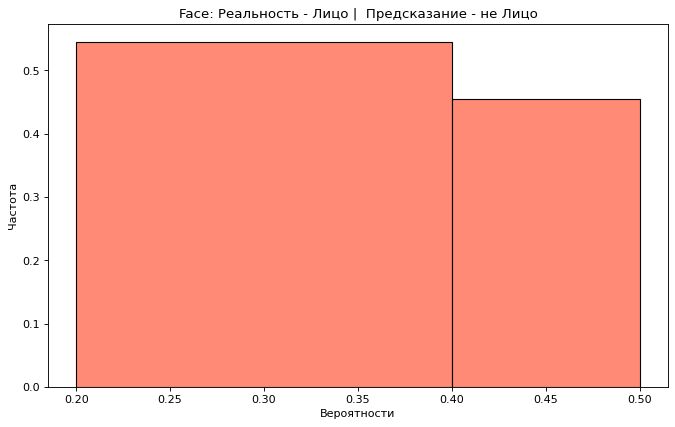

In [ ]:

import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
sns.histplot(sigm_true0_pred1, stat='probability',bins=[0.2,0.4,0.5],color='tomato',label='Probability of Passport vs All')

plt.xticks(np.arange(0.2,0.51,0.05))
plt.ylabel('Частота')
plt.xlabel('Вероятности')
plt.title('Face: Реальность - Лицо |  Предсказание - не Лицо')
plt.show()


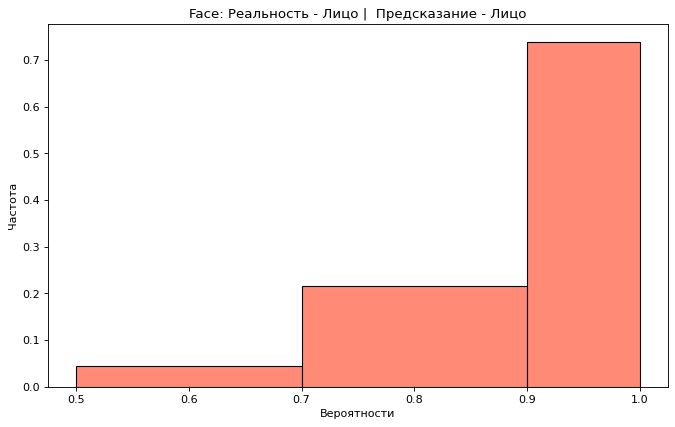

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
sns.histplot(sigm_true0_pred0,bins=[0.5,0.7,0.9,1], stat='probability',color='tomato',label='Probability of Passport vs All')

#plt.xticks(np.arange(0.2,0.7,0.05))
plt.ylabel('Частота')
plt.xlabel('Вероятности')
plt.title('Face: Реальность - Лицо |  Предсказание - Лицо')
plt.show()
